In [2]:
# 데이터 시각화를 위한 라이브러리 import
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


**데이터 준비하기**

In [5]:
df_patient = pd.read_csv('/content/PatientInfo.csv')

**01.covid-19데이터분석 전처리**

In [8]:
df_patient.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [9]:
df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [11]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   gender              3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

**데이터 결측치 확인**

In [13]:
df_patient.isna().sum()

patient_id               0
global_num            1112
gender                  77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

**나이 (age) -> 20S -> 23 정확하게 수자로 변경 -> 현재 년도 - 태어난 년도(birth_year)<br>**
1.Null(Nan) 데이터를 데이터를 처리 (Nan 계산불가)->0으로 채우자<br>
2.나이 계산 시, 0보다 큰 값은 (현재년도-태어난년도)0보다 작으면 다시 Nan 채우기

In [15]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,0,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,0,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [17]:
df_patient.isna().sum()

patient_id               0
global_num            1112
gender                  77
birth_year               0
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

In [19]:
#0보다 큰 값은 그대로 사용하고, 0인 값은 Nan으로 변환 -> 나이 계산 시 2021살 방지
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val : val if val > 0 else np.nan) 
#map.birth_yea 담아줌 lambda 결과를 리스트 값으로 바꿔줌 
# np.nan 넘파이 형식 결측지로 바꿔줌 

In [21]:
df_patient['age'] =2021 - df_patient['birth_year']
df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,NaN,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,NaN,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [23]:
patient = df_patient

**02.격리해제자(released)데이터**

In [24]:
#격리해제자 정보 담기
released = patient[patient.state =='released']
released.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 3382
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1886 non-null   int64  
 1   global_num          1220 non-null   float64
 2   gender              1867 non-null   object 
 3   birth_year          1606 non-null   float64
 4   age                 1606 non-null   float64
 5   country             1886 non-null   object 
 6   province            1886 non-null   object 
 7   city                1859 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1328 non-null   object 
 10  infection_order     29 non-null     float64
 11  infected_by         361 non-null    float64
 12  contact_number      455 non-null    float64
 13  symptom_onset_date  284 non-null    object 
 14  confirmed_date      1886 non-null   object 
 15  released_date       1314 non-null   object 
 16  deceas

**격리해제자들의 연령대 분석**

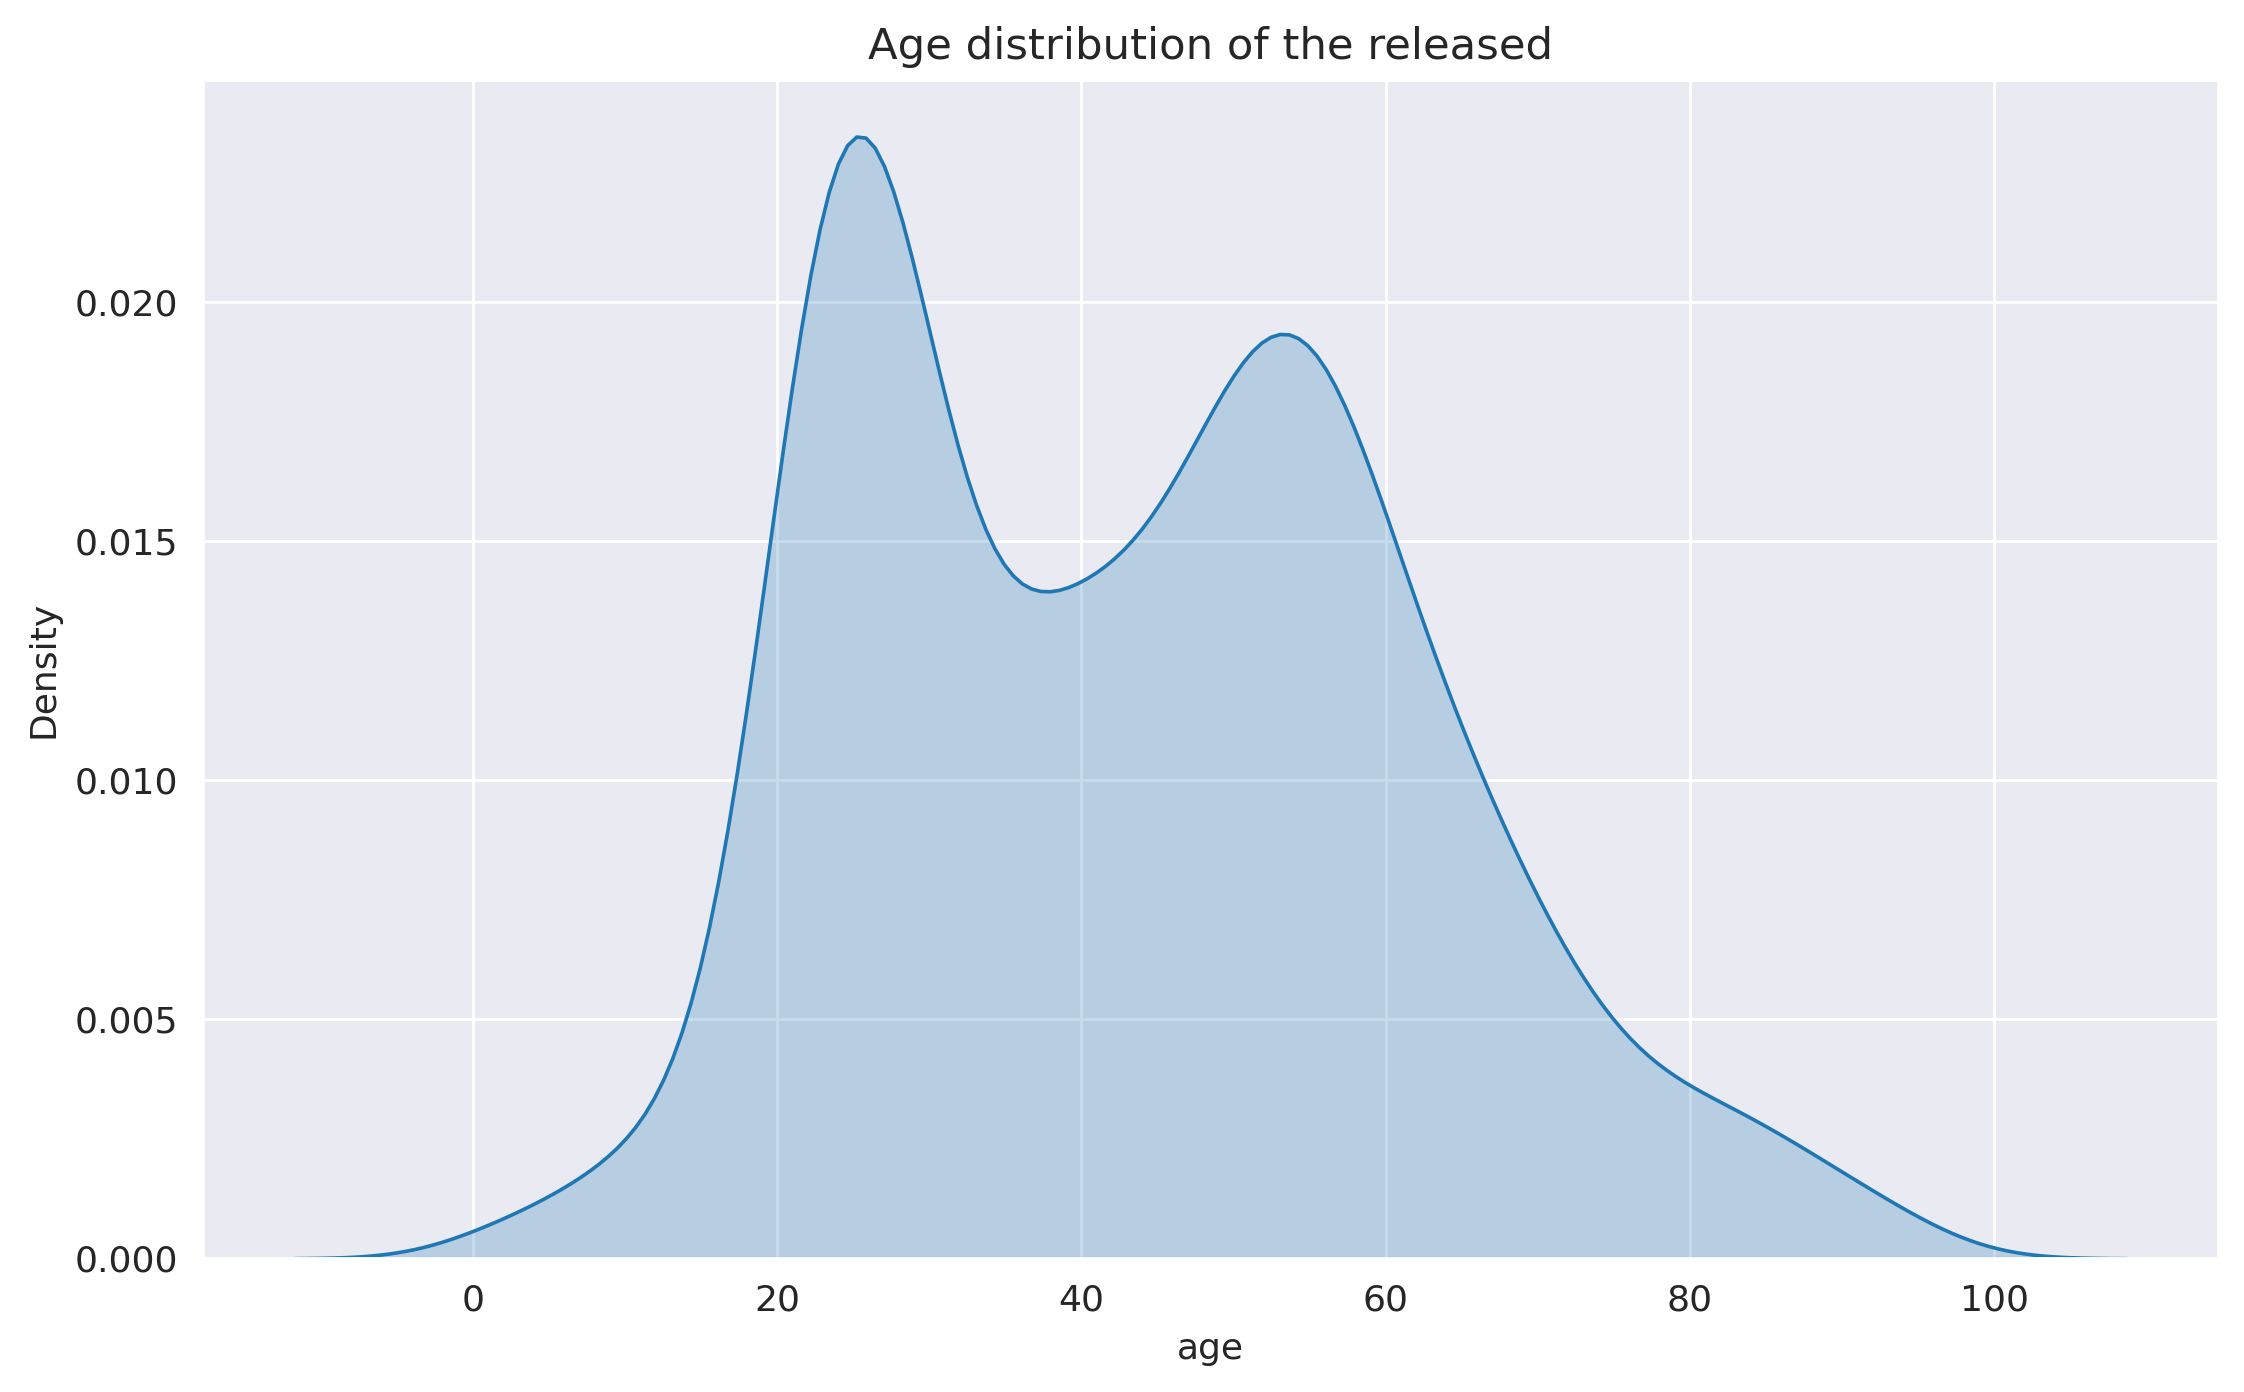

In [25]:
plt.figure(figsize=(10,6),dpi =130)
sns.set_style("darkgrid")
plt.title("Age distribution of the released")
sns.kdeplot(data = released['age'],shade= True)

**3.격리된(isolated)환자 데이터**

In [27]:
#격리된 환자의 정보 담기
isolated_state = patient[patient.state == "isolated"]
isolated_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 14 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1433 non-null   int64  
 1   global_num          997 non-null    float64
 2   gender              1375 non-null   object 
 3   birth_year          1257 non-null   float64
 4   age                 1257 non-null   float64
 5   country             1433 non-null   object 
 6   province            1433 non-null   object 
 7   city                1400 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1263 non-null   object 
 10  infection_order     2 non-null      float64
 11  infected_by         461 non-null    float64
 12  contact_number      184 non-null    float64
 13  symptom_onset_date  191 non-null    object 
 14  confirmed_date      1430 non-null   object 
 15  released_date       11 non-null     object 
 16  decea

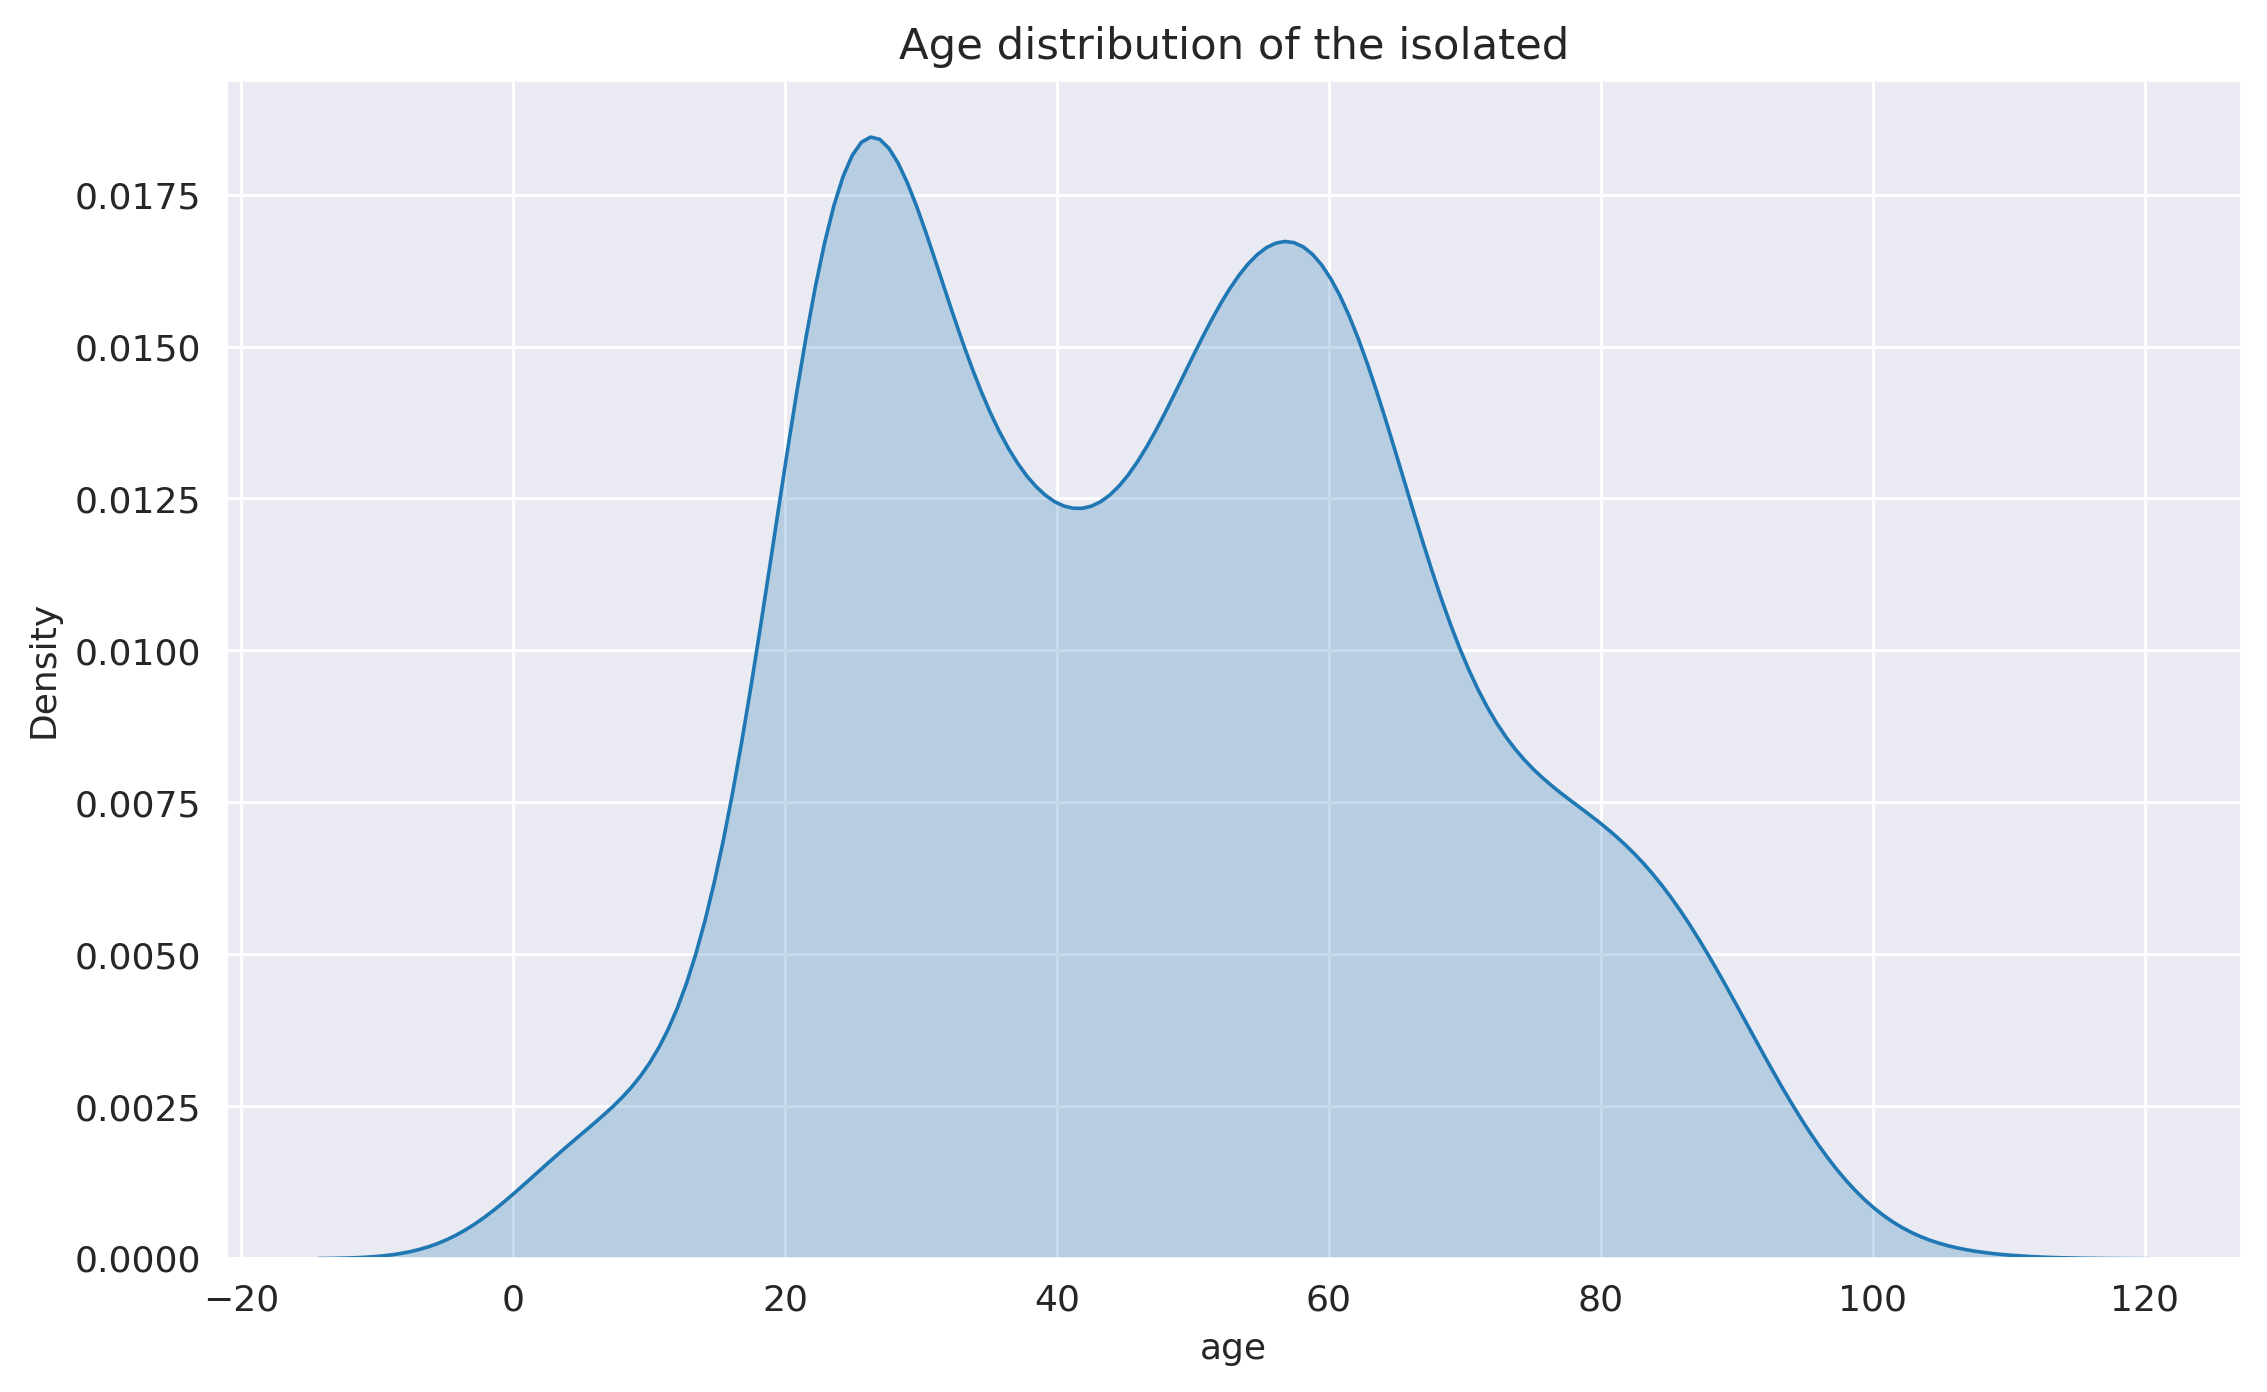

In [28]:
#격리해제자들의 연령대 분포 
plt.figure(figsize=(10,6),dpi =130)
sns.set_style("darkgrid")
plt.title("Age distribution of the isolated")
sns.kdeplot(data = isolated_state['age'],shade= True)

**4.사망자(deceased)데이터**

In [30]:
#사망자의 정보
dead = patient[patient.state == "deceased"]
dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 108 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          69 non-null     int64  
 1   global_num          59 non-null     float64
 2   gender              69 non-null     object 
 3   birth_year          64 non-null     float64
 4   age                 64 non-null     float64
 5   country             69 non-null     object 
 6   province            69 non-null     object 
 7   city                50 non-null     object 
 8   disease             18 non-null     object 
 9   infection_case      29 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      4 non-null      float64
 13  symptom_onset_date  6 non-null      object 
 14  confirmed_date      69 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

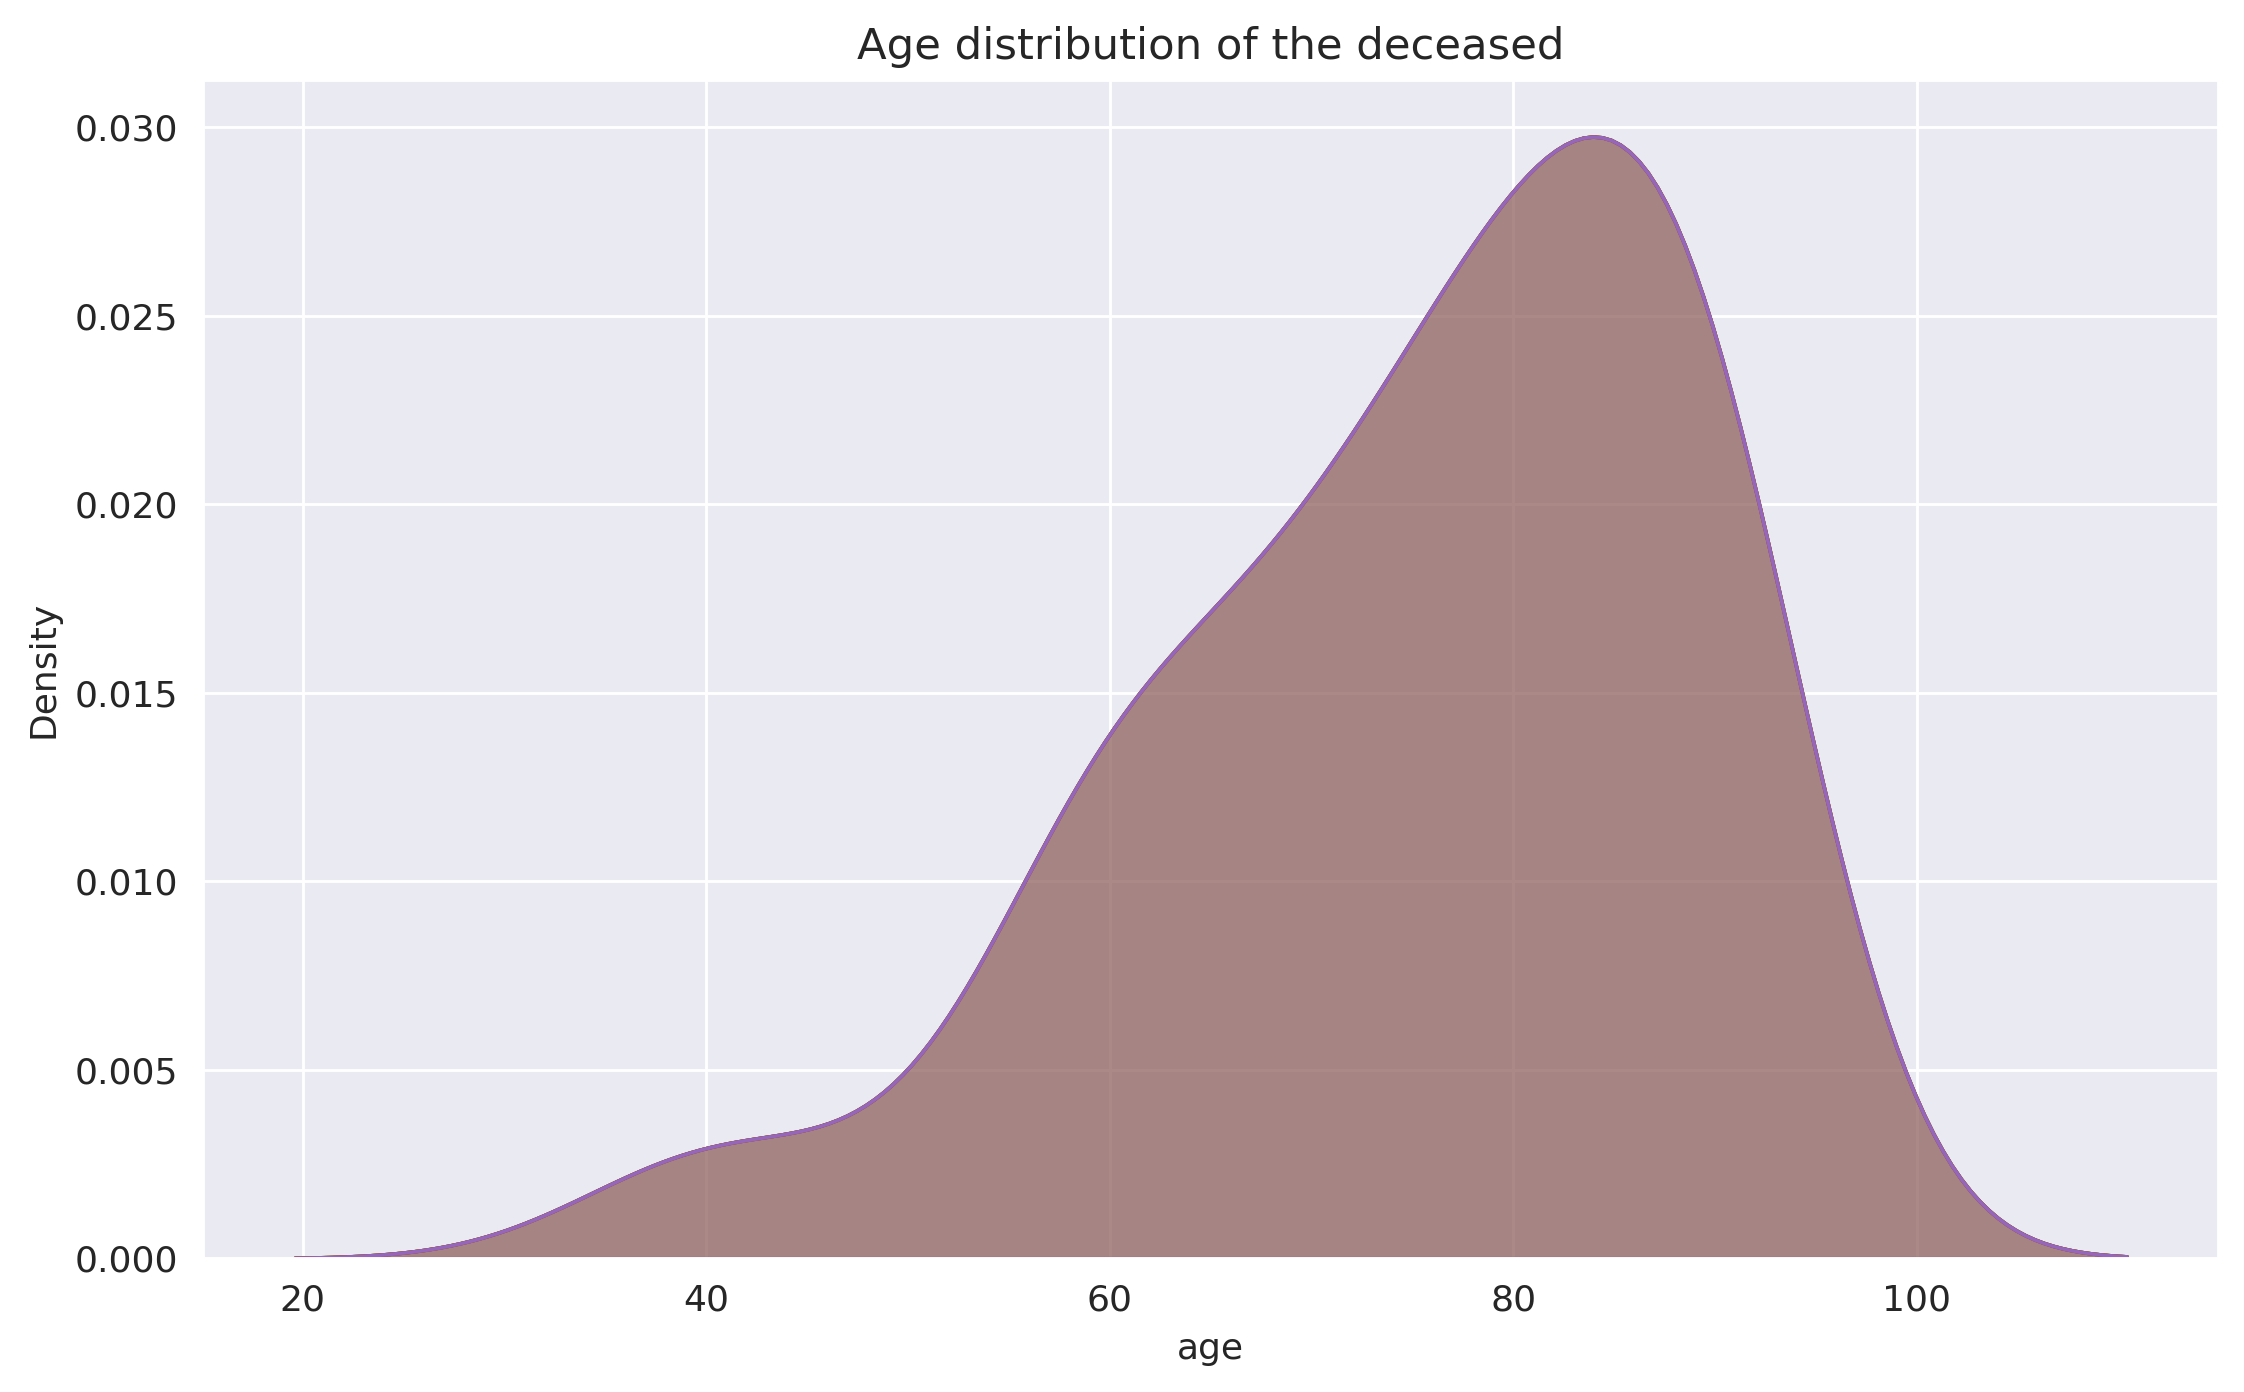

In [31]:
#격리해제자들의 연령대 분포 
plt.figure(figsize=(10,6),dpi =130)
sns.set_style("darkgrid")
plt.title("Age distribution of the deceased")
sns.kdeplot(data = dead['age'],shade= True)
sns.kdeplot(data = dead['age'],shade= True)
sns.kdeplot(data = dead['age'],shade= True)
sns.kdeplot(data = dead['age'],shade= True)
sns.kdeplot(data = dead['age'],shade= True)

**05.사망자에 따른 성별(gender)데이터**

In [33]:
male_dead = dead[dead.gender == "male"]
female_dead = dead[dead.gender == "female"]

male_dead.head()
female_dead.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
727,1100000095,NaN,female,1932.0,89.0,Korea,Busan,etc,NaN,NaN,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased
772,1200000038,38.0,female,1963.0,58.0,Korea,Daegu,Nam-gu,True,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased
813,1200000901,901.0,female,1934.0,87.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,NaN,2020-03-04,deceased
814,1200001064,1064.0,female,1943.0,78.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26,NaN,2020-03-01,deceased
820,1200002614,2614.0,female,1943.0,78.0,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-29,NaN,2020-03-01,deceased


In [35]:
male_dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 108 to 3154
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          44 non-null     int64  
 1   global_num          39 non-null     float64
 2   gender              44 non-null     object 
 3   birth_year          42 non-null     float64
 4   age                 42 non-null     float64
 5   country             44 non-null     object 
 6   province            44 non-null     object 
 7   city                31 non-null     object 
 8   disease             13 non-null     object 
 9   infection_case      20 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  5 non-null      object 
 14  confirmed_date      44 non-null     object 
 15  released_date       0 non-null      object 
 16  deceas

In [36]:
female_dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 727 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          25 non-null     int64  
 1   global_num          20 non-null     float64
 2   gender              25 non-null     object 
 3   birth_year          22 non-null     float64
 4   age                 22 non-null     float64
 5   country             25 non-null     object 
 6   province            25 non-null     object 
 7   city                19 non-null     object 
 8   disease             5 non-null      object 
 9   infection_case      9 non-null      object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  1 non-null      object 
 14  confirmed_date      25 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

**성별에 따른 사망자의 연령분포 **

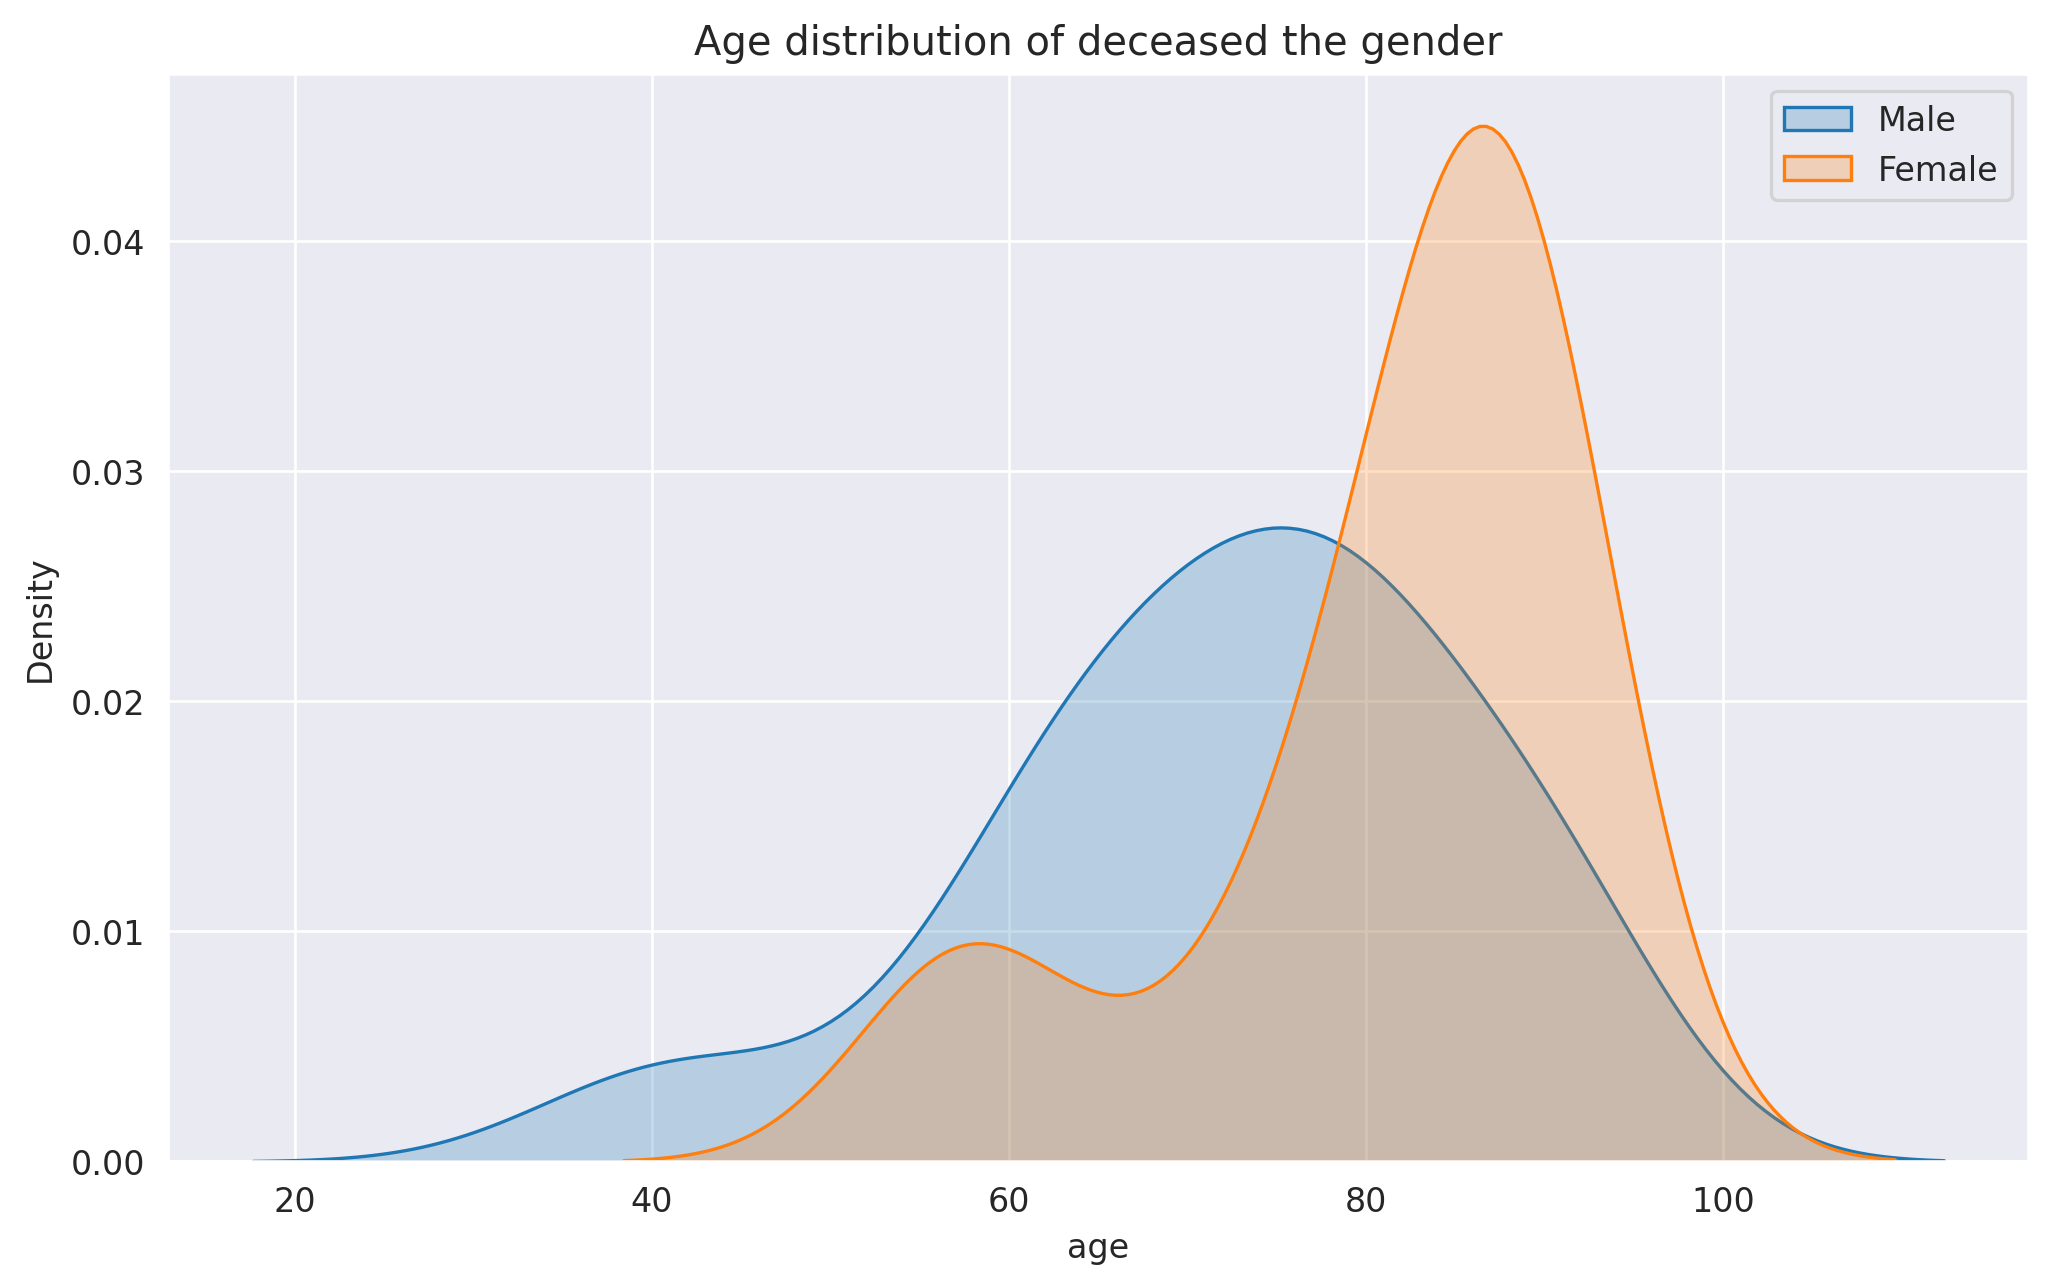

In [38]:
#성별에 따른 사망자의 연령 분포 
plt.figure(figsize=(10,6),dpi =120)
sns.set_style("darkgrid")
plt.title("Age distribution of deceased the gender")
sns.kdeplot(data =male_dead['age'],label='Male',shade= True)
sns.kdeplot(data =female_dead['age'],label='Female',shade= True)
plt.legend()

**KDE : Kernel Density Estimator추가한 distplot()**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



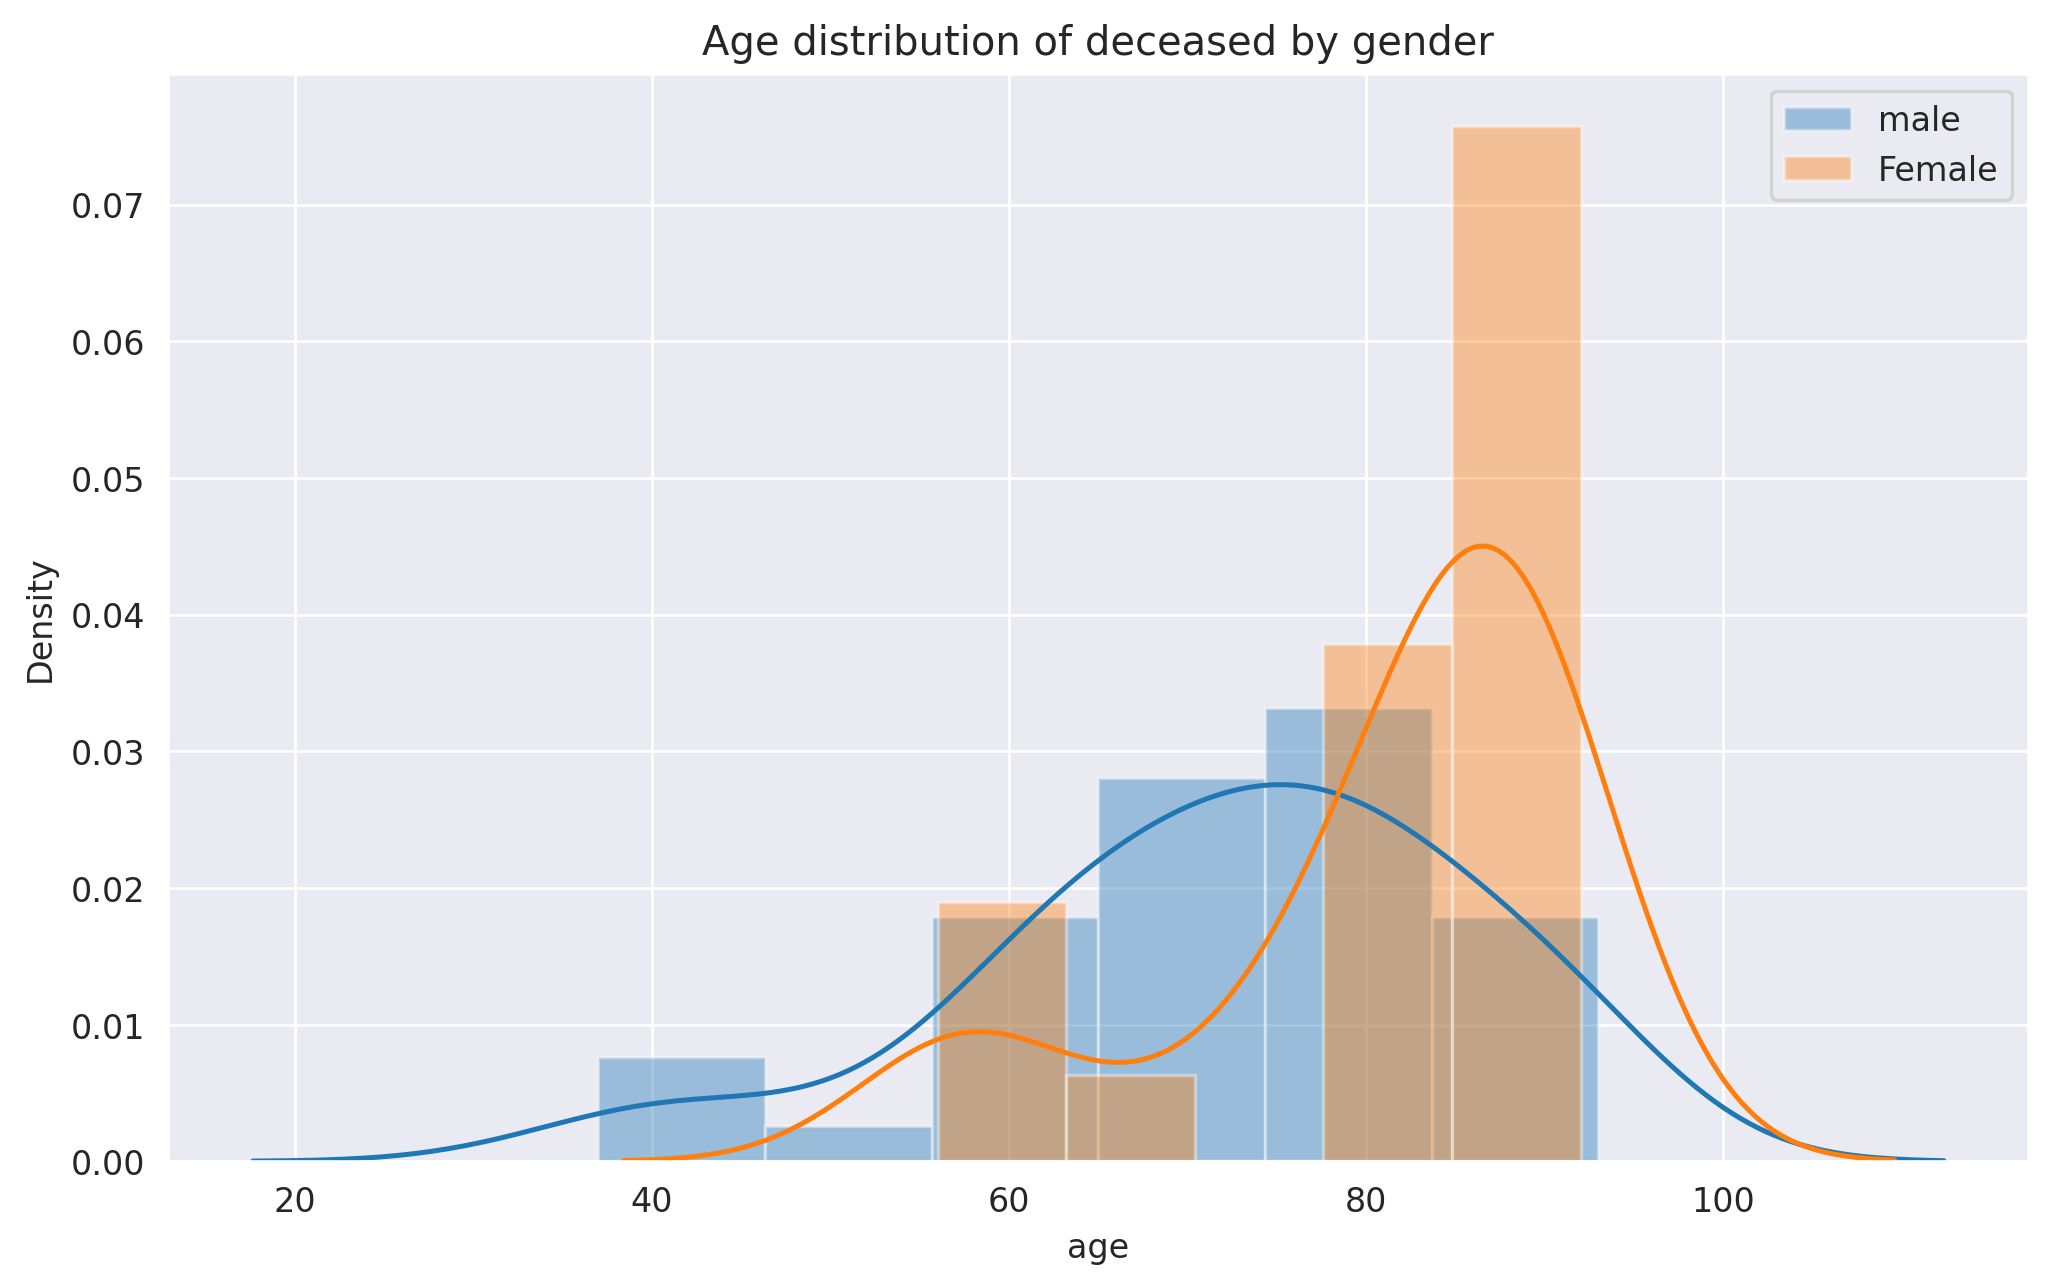

In [39]:
#성별에 따른 사망자의 연령 분포 
plt.figure(figsize=(10,6),dpi =120)
sns.set_style("darkgrid")
plt.title("Age distribution of deceased by gender")
sns.distplot(a =male_dead['age'],label='male',kde= True)
sns.distplot(a =female_dead['age'],label='Female',kde= True)
plt.legend()

**사망자 성별 비교-> 바차트,파이차트-> 분포**

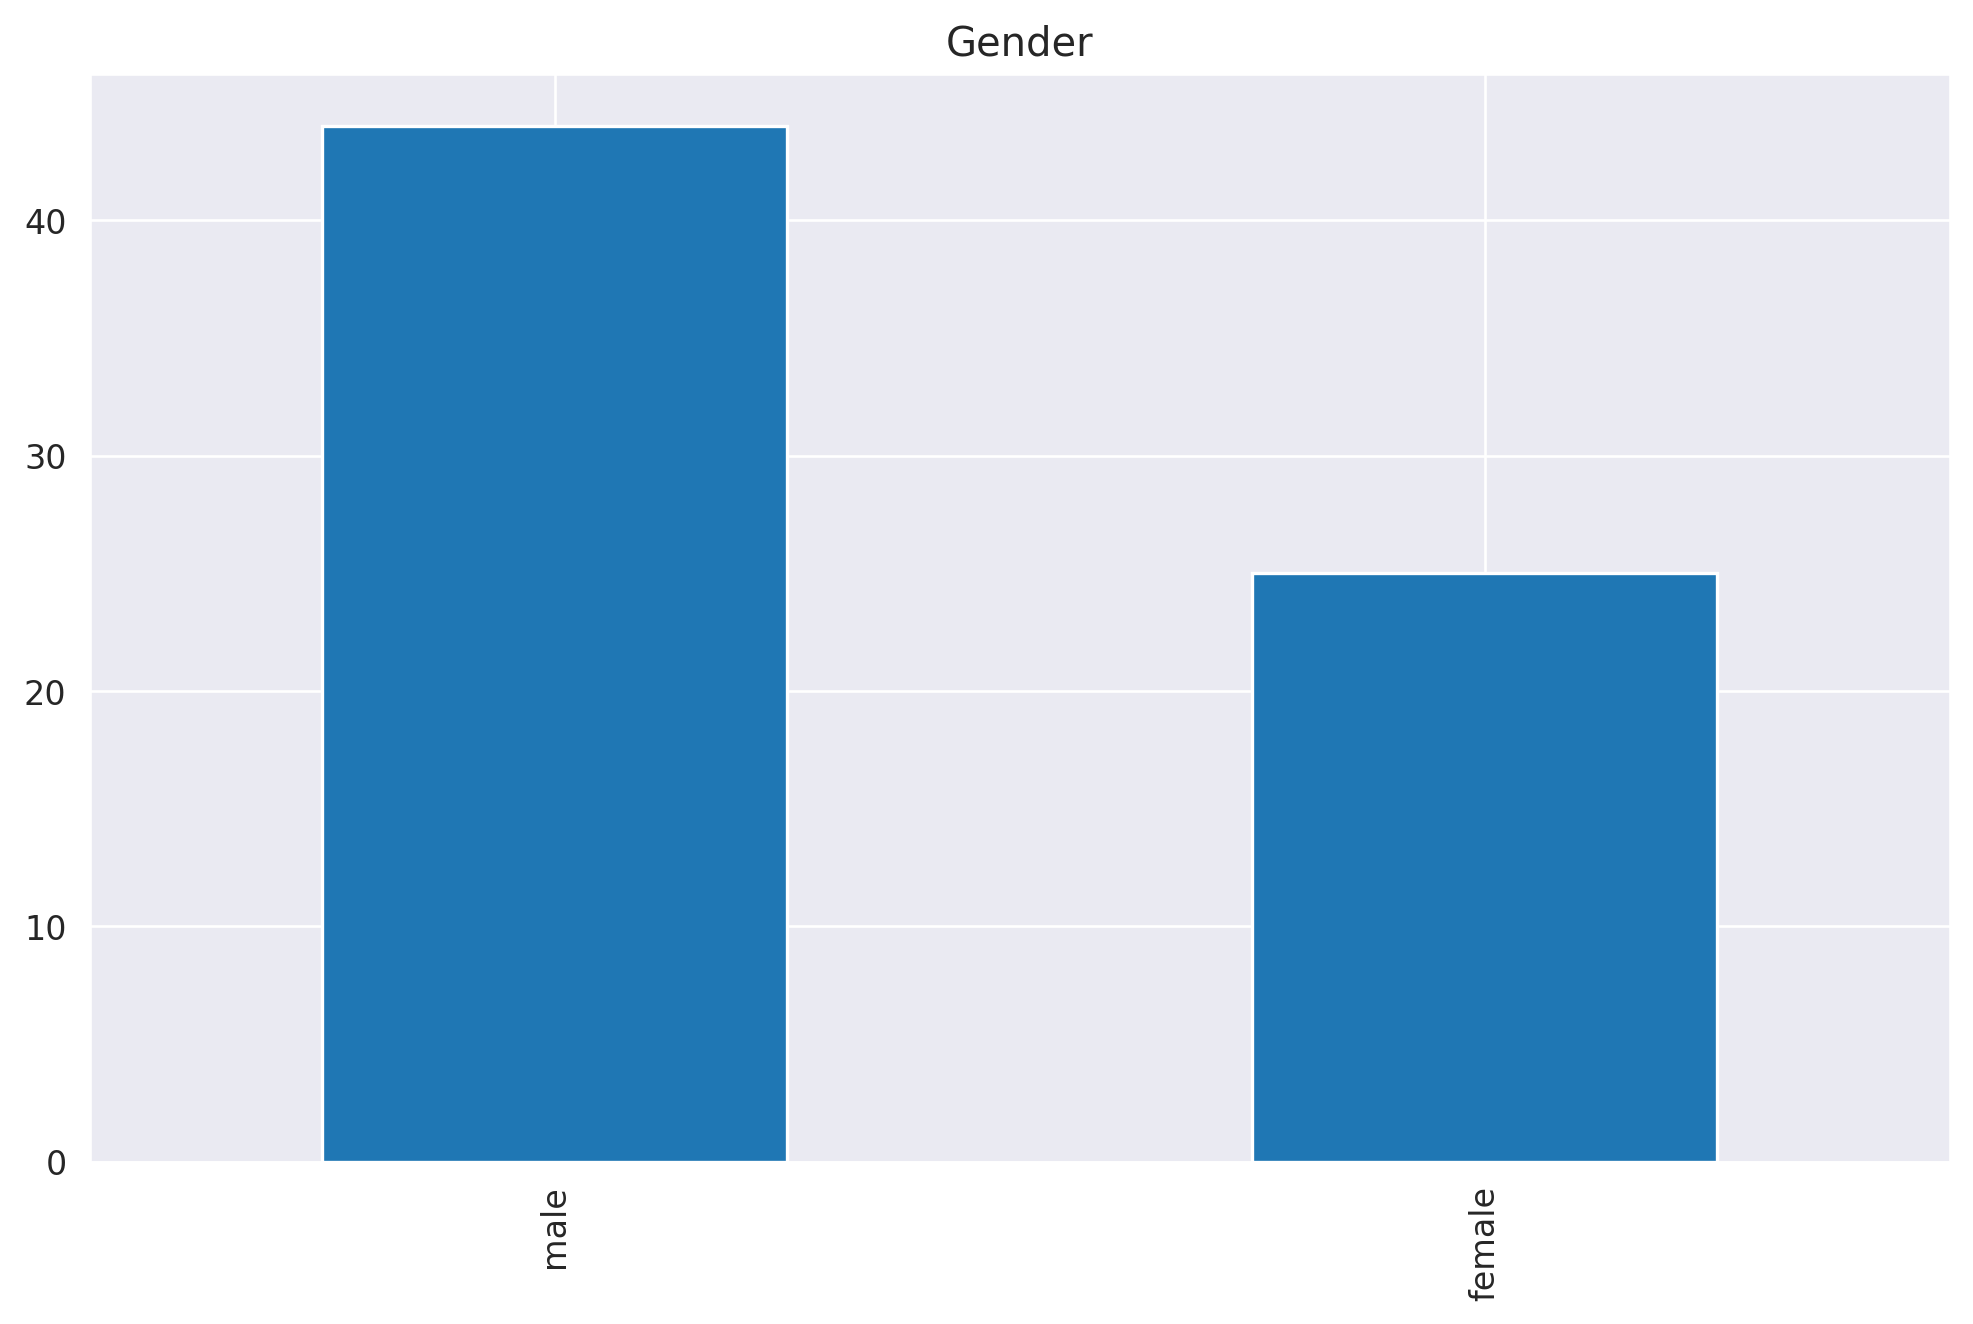

In [41]:
plt.figure(figsize=(10,6),dpi =120)
plt.title("Gender")
dead.gender.value_counts().plot.bar()

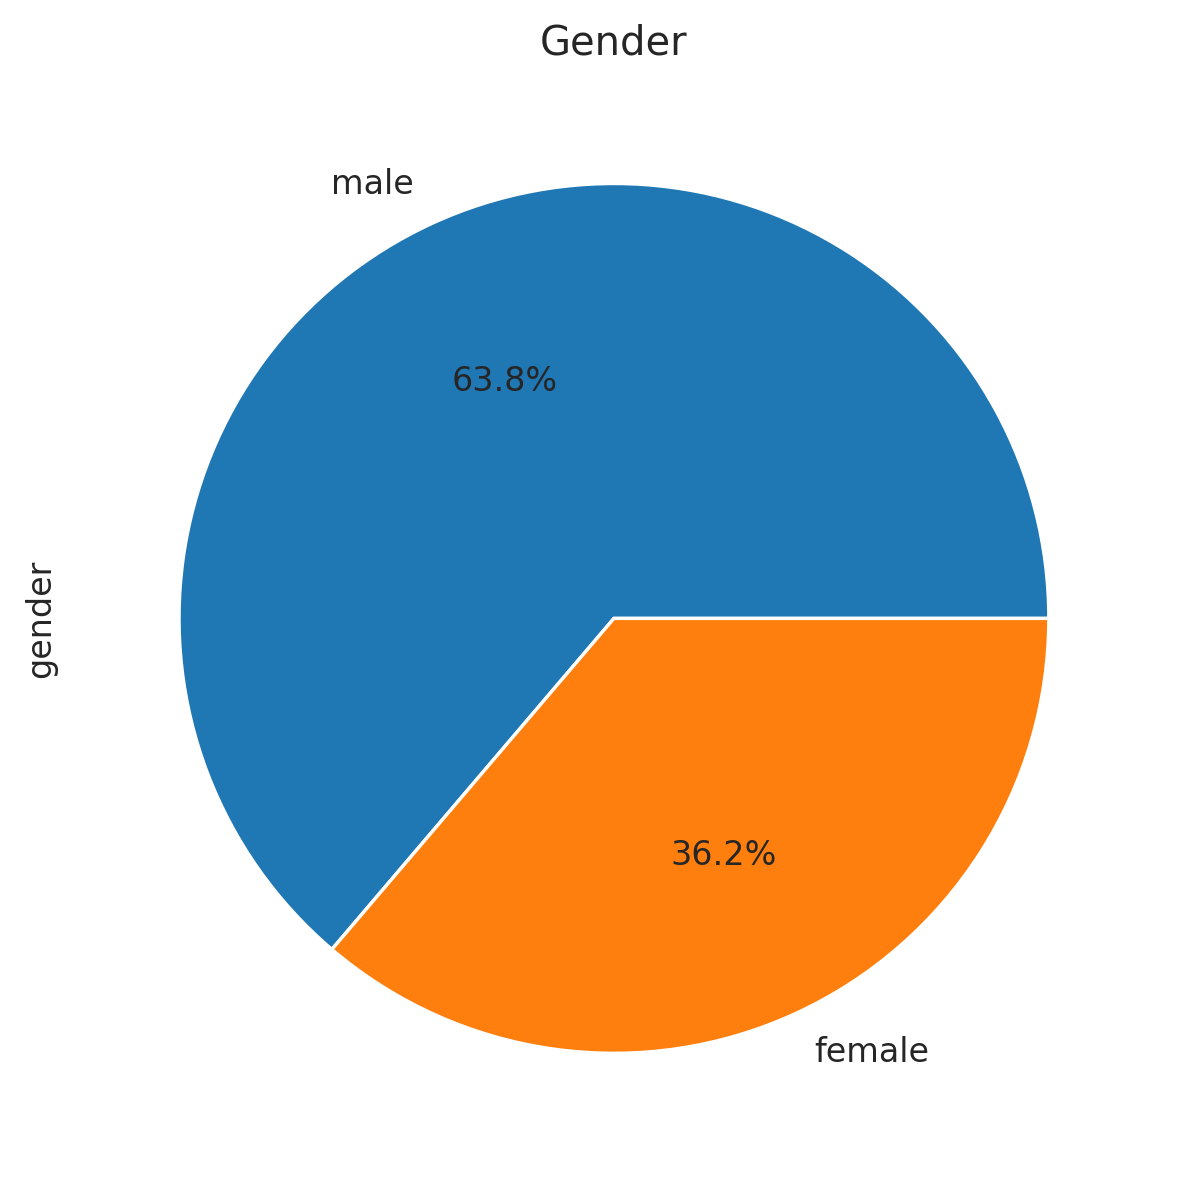

In [42]:
plt.figure(figsize=(10,6),dpi =120)
plt.title("Gender")
dead.gender.value_counts().plot.pie(autopct = '%.1f%%')

**환자 유형별(격리해제자,격리중인 환자,사망자)연령분포**

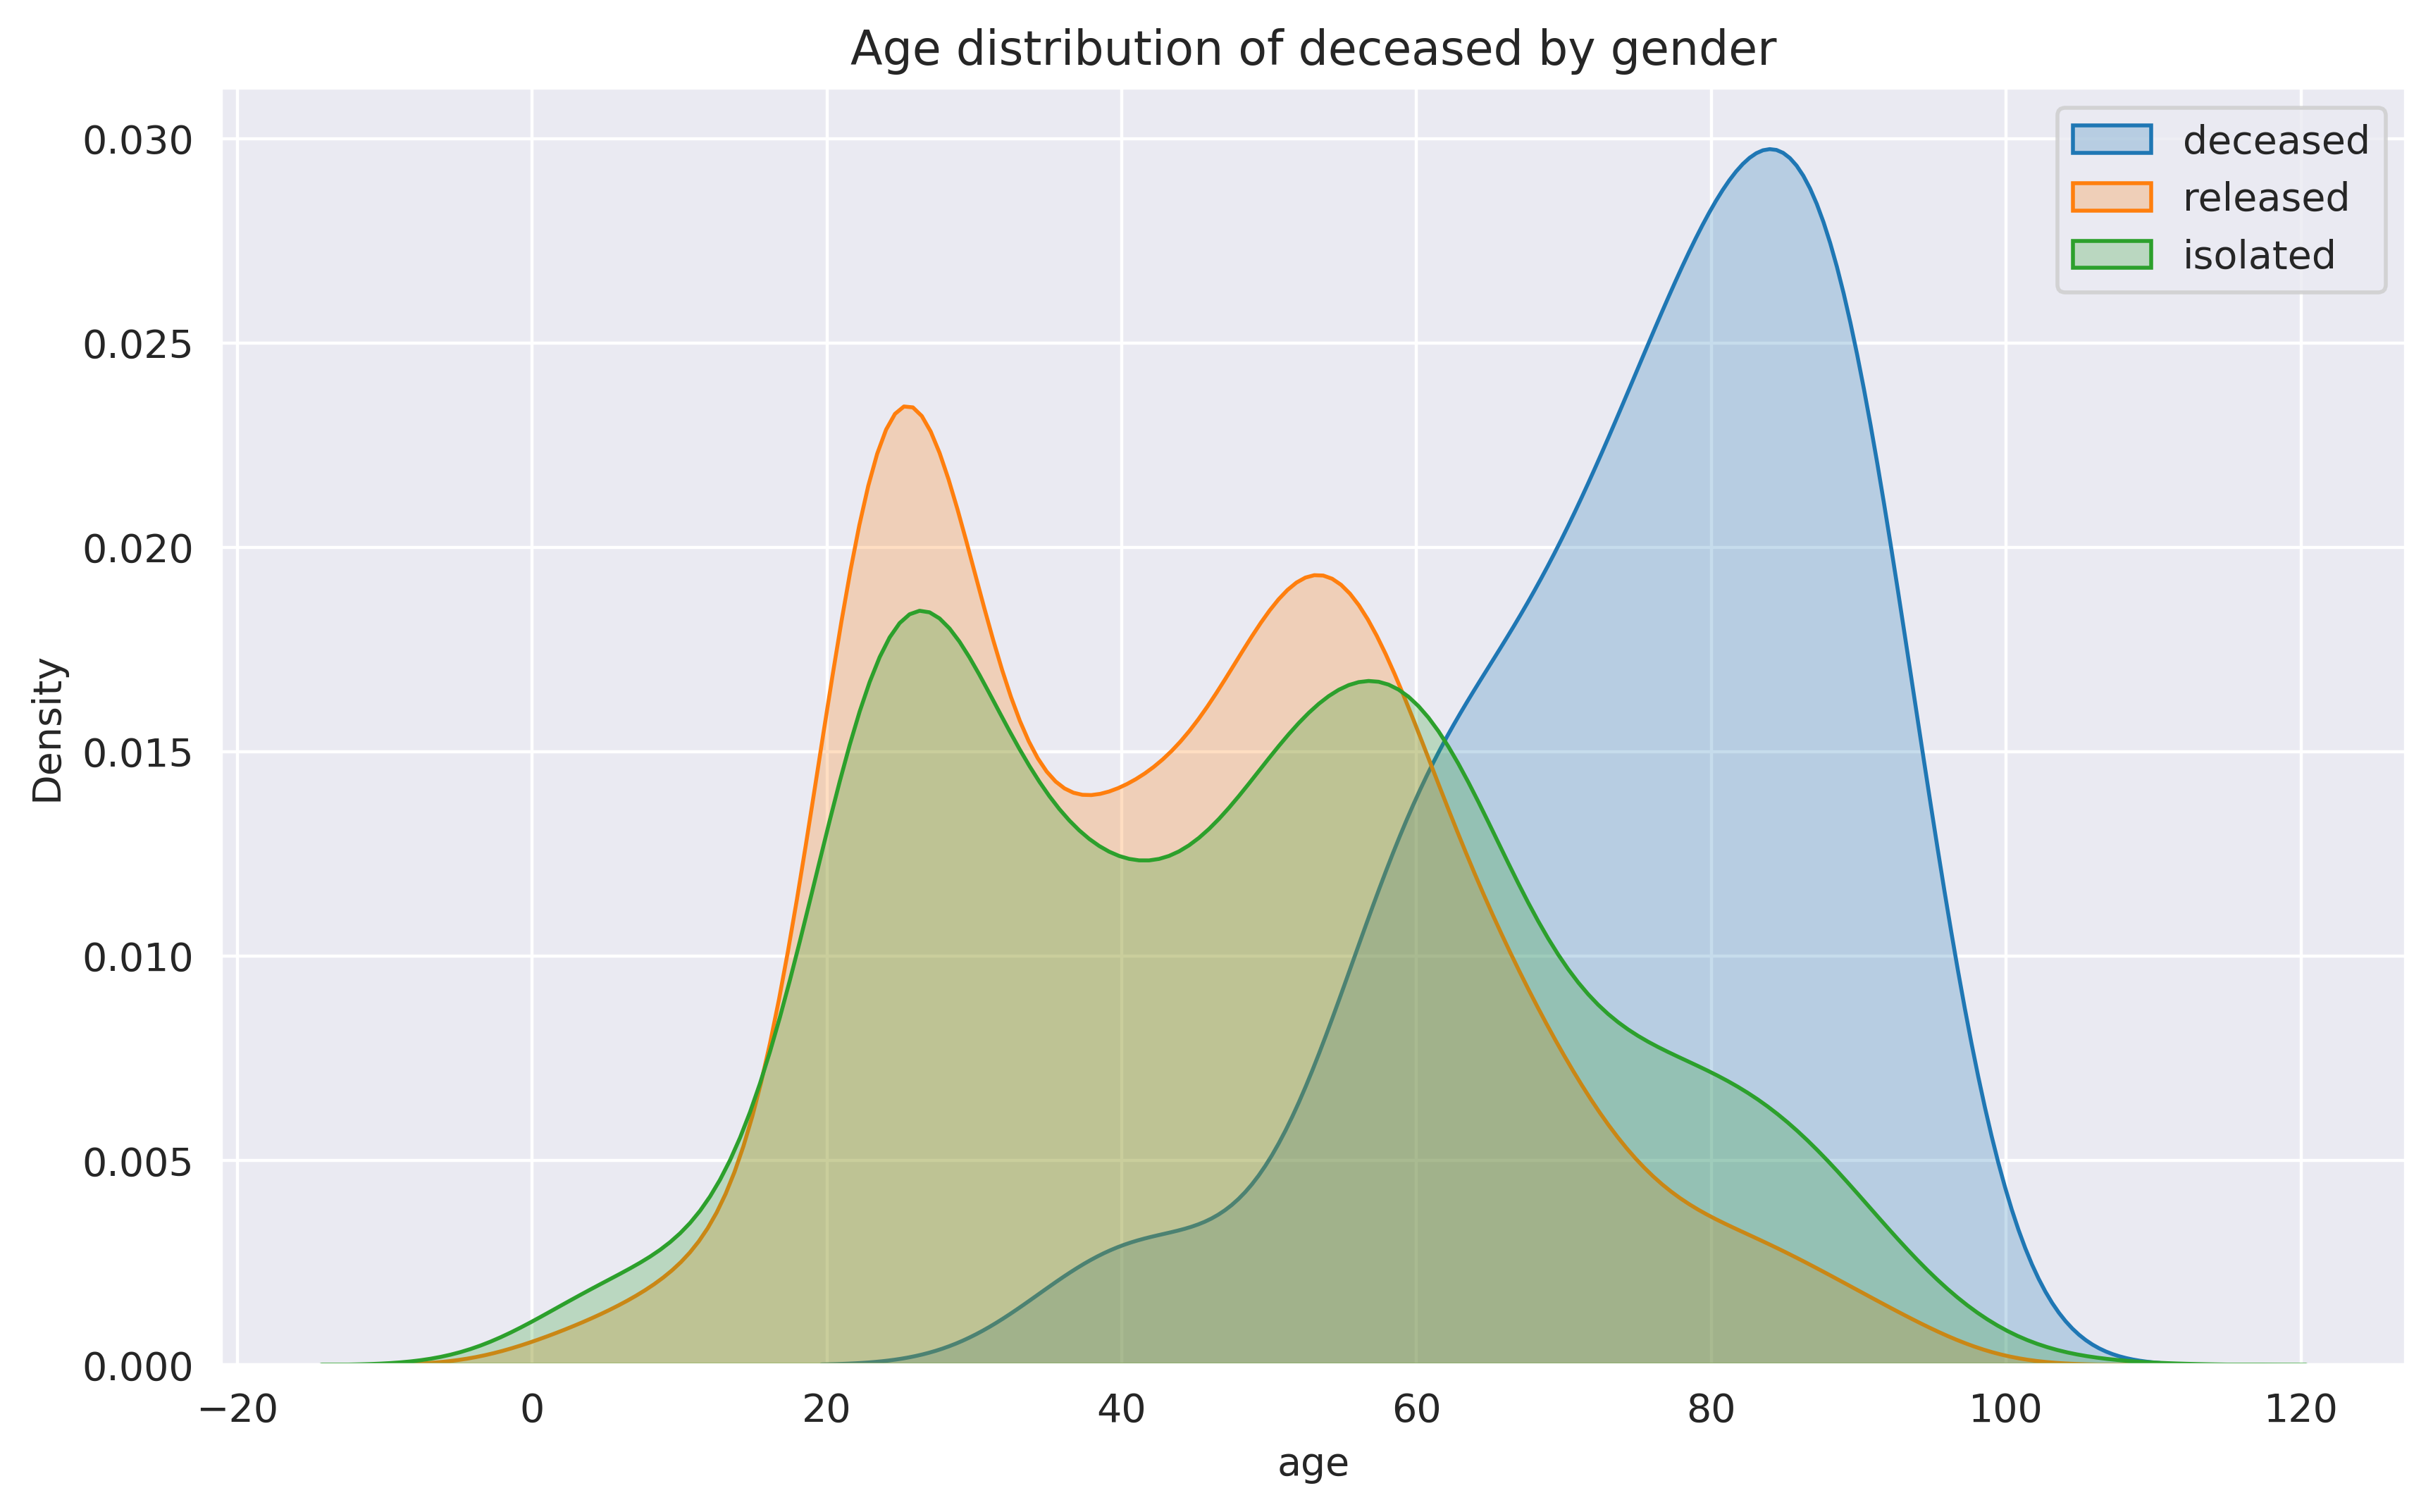

In [43]:
#성별에 따른 사망자의 연령 분포 
plt.figure(figsize=(10,6),dpi =200)
sns.set_style("darkgrid")
plt.title("Age distribution of deceased by gender")
sns.kdeplot(data=dead['age'], label = 'deceased',shade=True)
sns.kdeplot(data=released['age'], label = 'released',shade=True)
sns.kdeplot(data=isolated_state['age'], label = 'isolated',shade=True)
plt.legend()

**환자유형별(격리해제자,격리중인환자,사망자)비율**<br>
저희 환자 유형별 (격래해제자, 격리중, 사망) 비율 파이차트로 그려보세요

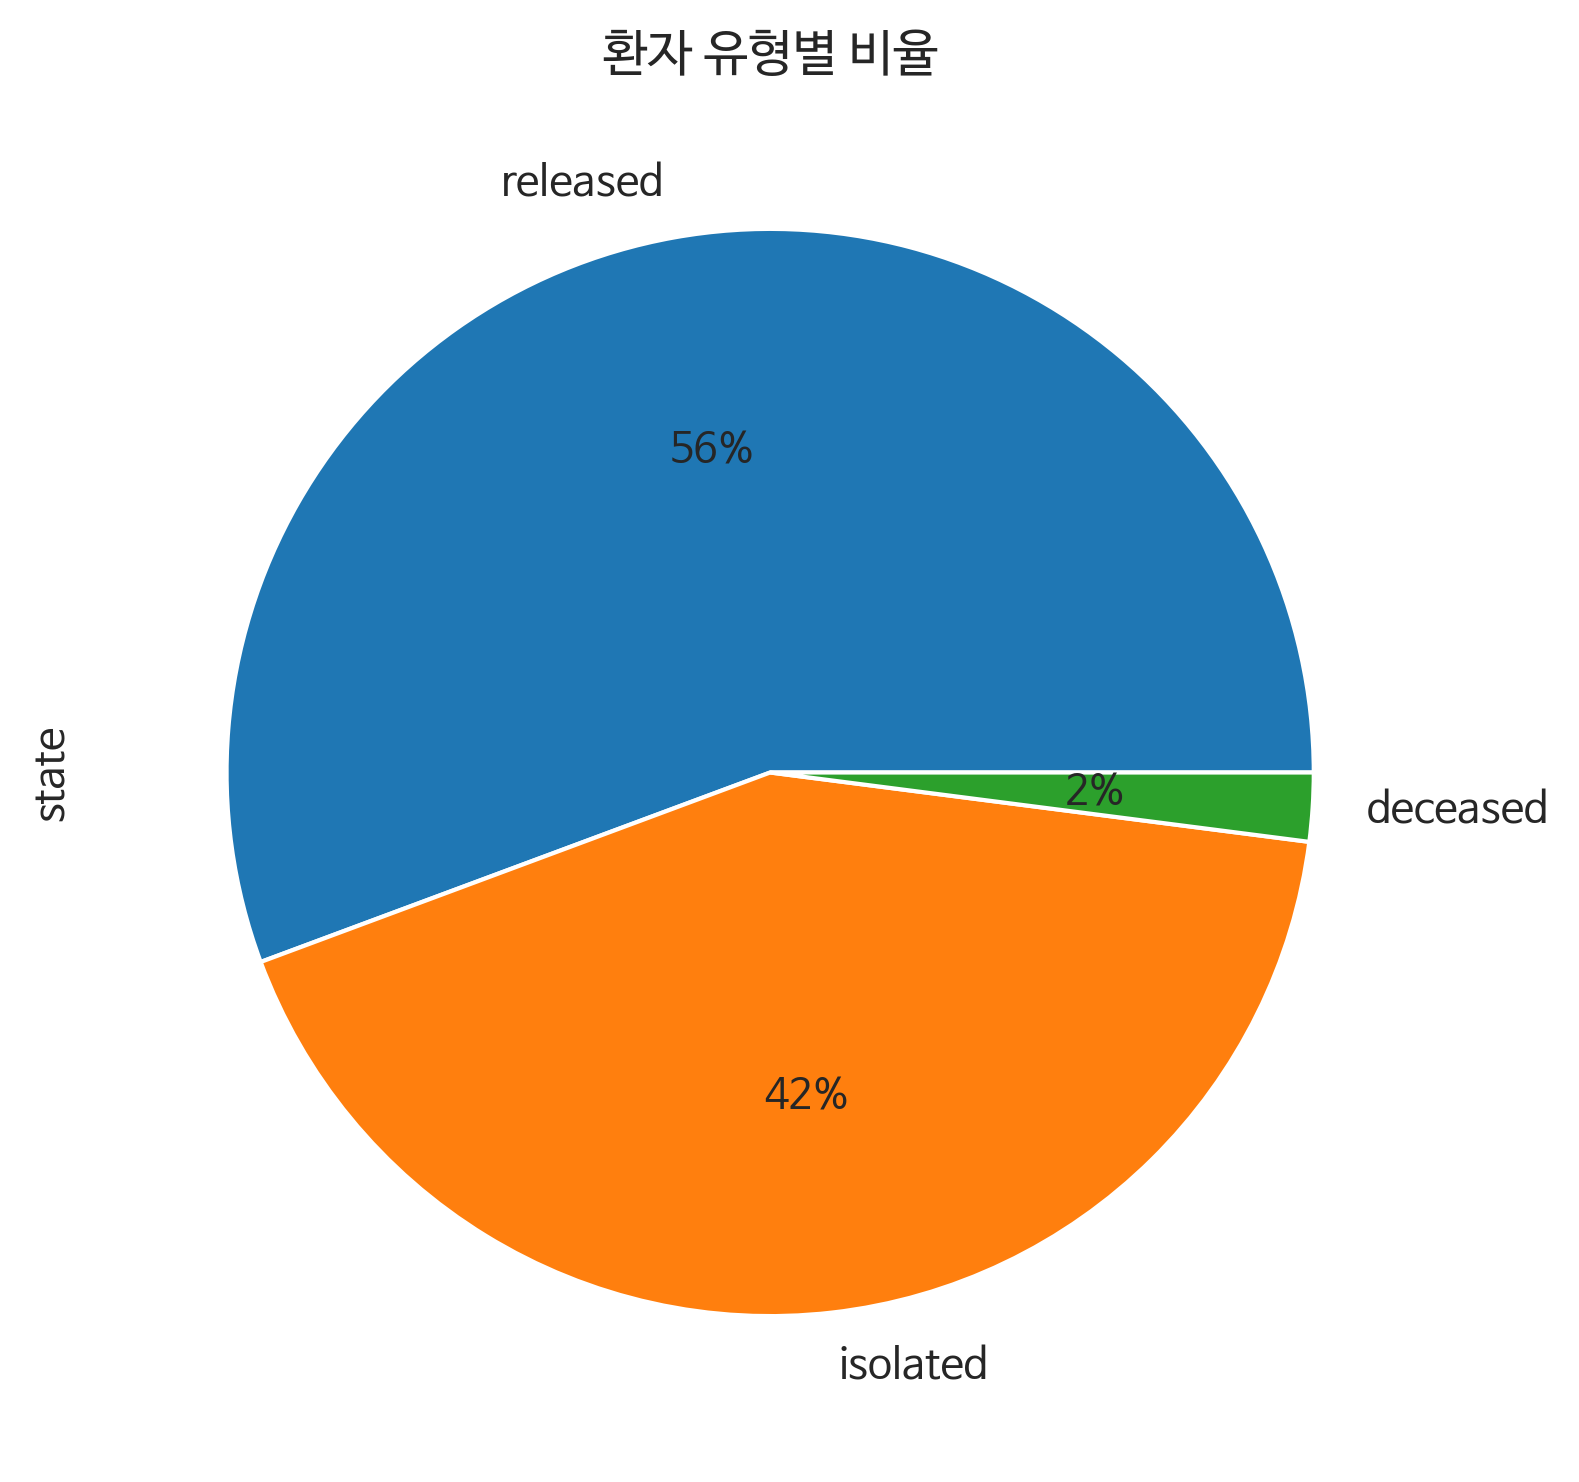

In [45]:

isolated_patient = patient[patient.state == 'isolated']
deceased_patient = patient[patient.state == 'deceased']
released_patient = patient[patient.state == 'released']


plt.figure(figsize=(10,6), dpi=150)
plt.rc('font', family = 'NanumBarunGothic')
plt.title('환자 유형별 비율')
patient.state.value_counts().plot.pie(autopct='%.0f%%')
#print(df_patient['state'].unique())

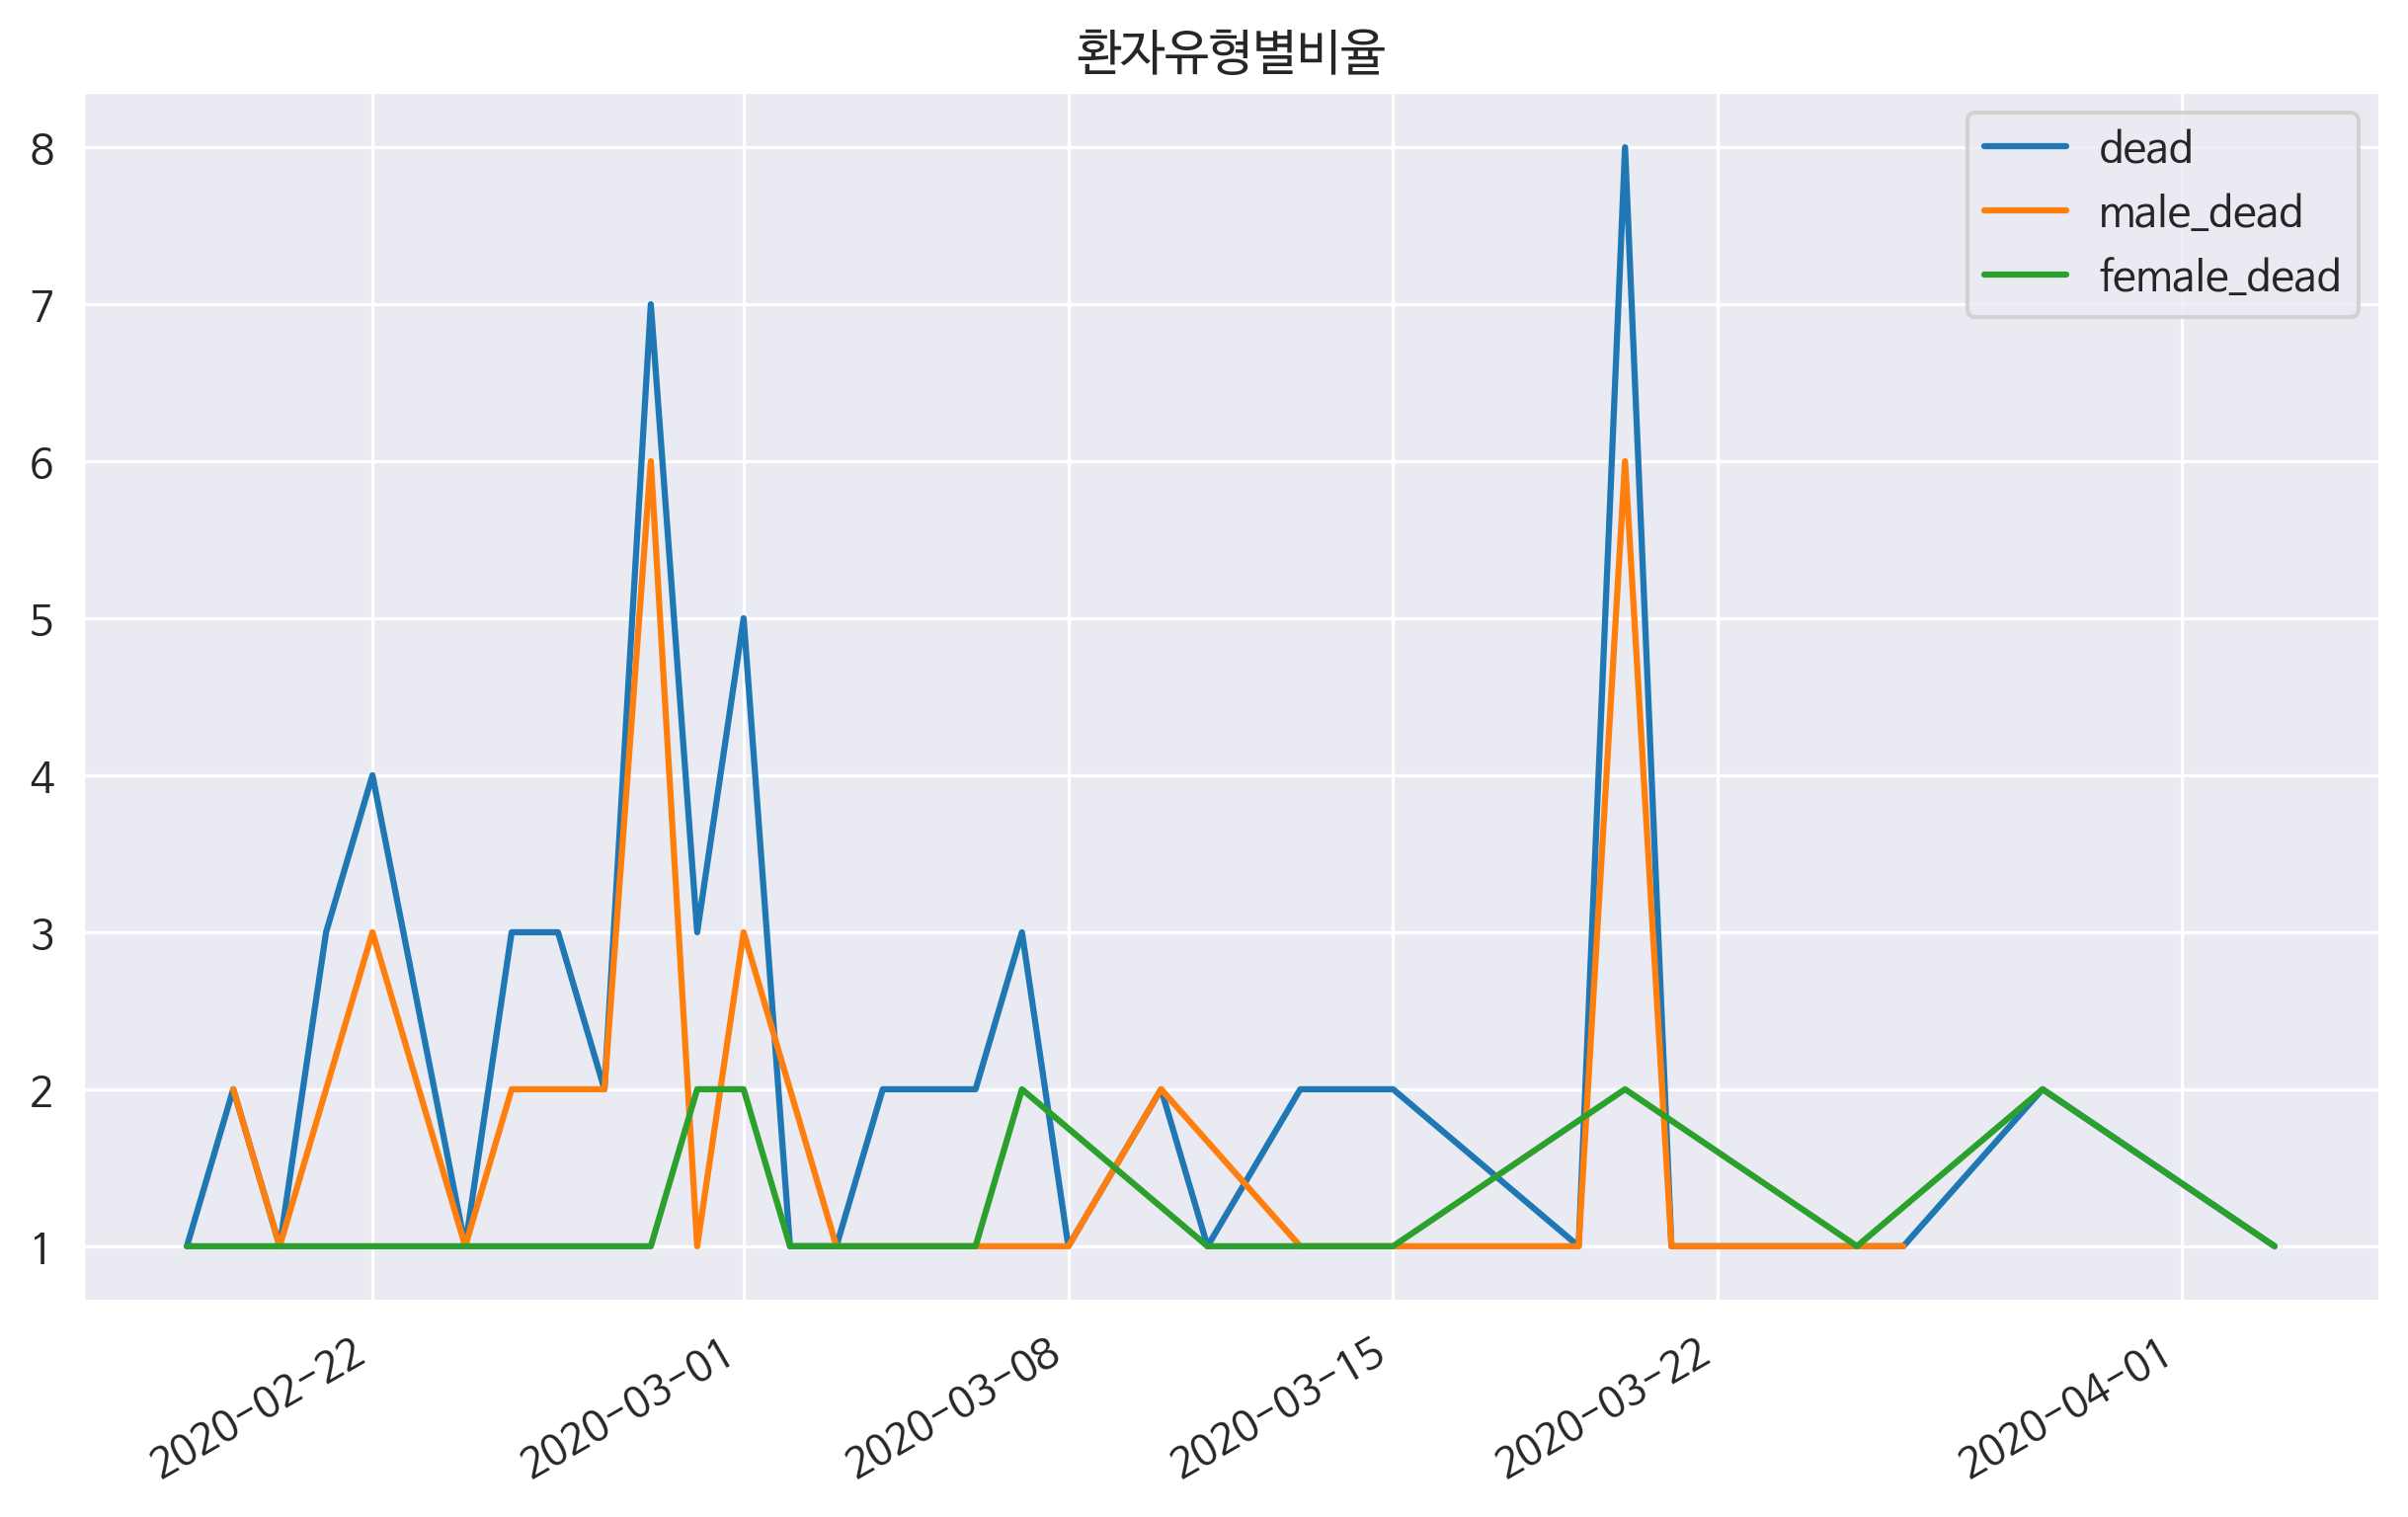

In [57]:

plt.figure(figsize=(10,6), dpi=150)
plt.title('환자유형별비율') 
pd.to_datetime(dead.confirmed_date).value_counts().plot(label ='dead')
pd.to_datetime(male_dead.confirmed_date).value_counts().plot(label ='male_dead')
pd.to_datetime(female_dead.confirmed_date).value_counts().plot(label ='female_dead')
plt.legend() 